In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
column_names = [
                "pclass", "survived", "name", "sex", "age", "sibsp", "parch",
                "ticket", "fare", "cabin", "embarked", "boat", "body", "home.dest"
               ]
df=pd.read_csv('Zbiór danych Titanic.arff.txt',skiprows=17, names=column_names)
df=df.replace('?', np.nan)
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['fare'] = pd.to_numeric(df['fare'], errors='coerce')


In [3]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [4]:
df.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

1. Sprawdź liczebność poszczególnych etykiet dla danych zmiennych jakościowych

In [15]:
etykiety={}
mean_len_cols=0
for column in df.columns:
    print(f'Liczba etykiet zmiennej {column}: {len(df[column].unique())}')
    etykiety[column]=len(df[column].unique())
    mean_len_cols+=len(df[column].unique())
mean_len_cols/=14

Liczba etykiet zmiennej pclass: 3
Liczba etykiet zmiennej survived: 2
Liczba etykiet zmiennej name: 1307
Liczba etykiet zmiennej sex: 2
Liczba etykiet zmiennej age: 99
Liczba etykiet zmiennej sibsp: 7
Liczba etykiet zmiennej parch: 8
Liczba etykiet zmiennej ticket: 929
Liczba etykiet zmiennej fare: 282
Liczba etykiet zmiennej cabin: 187
Liczba etykiet zmiennej embarked: 4
Liczba etykiet zmiennej boat: 28
Liczba etykiet zmiennej body: 122
Liczba etykiet zmiennej home.dest: 370


2.     Wyświetl z użyciem funkcji print liczbę wszystkich pasażerów. Wykorzystaj podobny sposób jak w ptk 1.

In [16]:
print(len(df.index.unique()))

1309


In [23]:
df['boat'].nunique()

27

3.     Skomentuj wyniki otrzymane w punkcie 1 i 2. Podziel zmienne ze względu na dużą i małą moc zbioru (kardynalność).

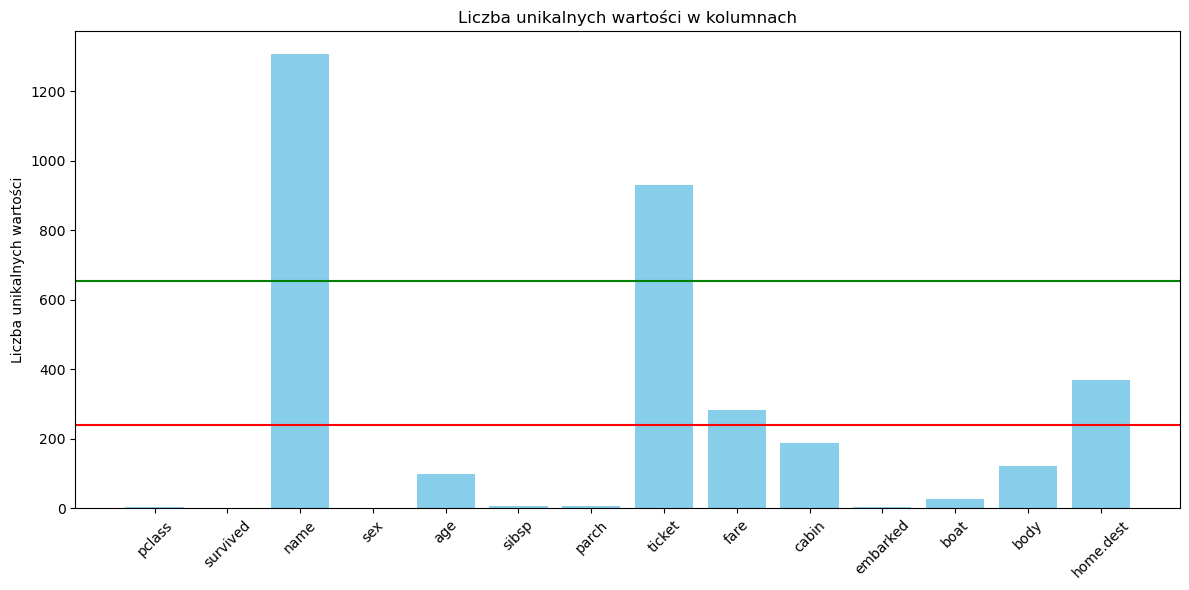

In [19]:
plt.figure(figsize=(12, 6))
plt.bar(etykiety.keys(), etykiety.values(), color='skyblue')
plt.xticks(rotation=45)
plt.ylabel('Liczba unikalnych wartości')
plt.title('Liczba unikalnych wartości w kolumnach')
plt.axhline(mean_len_cols, color='red')
plt.axhline(len(df.index.unique())/2, color='green')
plt.tight_layout()
plt.show()

Czerwona linia symbolizuje średnią ilość wartości unikalnych ze wszystkich kolumn. Zielona linia to połowa wszystkich kolumn. Do zbioru o małej kardynalności napewno zaliczyłbym te zmienne, które znajdują się pod obiema poziomymi liniami: age, sibsp, parch, cabin, body, boat. Do zbioru o dużej kardynalności zaliczyłbym zmienne przekraczające linię zieloną (name, ticket). Zmenne będące pomiędzy tymi liniami zaklasyfikowałbym jako zbiory o średniej kardynalności (home.dest, fare),

4. Sprawdź, ile unikalnych etykiet ma zmienna mówiąca o kabinie danego pasażera. Użyj takiej funkcji, która zwraca wynik w postaci NumPy array.

In [27]:
unique_cabins = df['cabin'].dropna().unique() 
print(type(unique_cabins))
print(len(unique_cabins))

<class 'numpy.ndarray'>
186


5.     Zredukuj liczbę cech dla zmiennej opisującej kabiny poprzez zastąpienie obecnych etykiet w formacie LL11 do etykiet zawierających tylko pierwszą literę. Użyj astype(str).str[pozycja]. Nową zmienną nazwij CabinReduced. Wyświetl pierwsze 20 wierszy zbioru danych dla kolumn Cabin i CabinReduced

In [29]:
df['CabinReduced'] = df['cabin'].astype(str).str[0]
print(df[['cabin', 'CabinReduced']].head(20))

      cabin CabinReduced
0        B5            B
1   C22 C26            C
2   C22 C26            C
3   C22 C26            C
4   C22 C26            C
5       E12            E
6        D7            D
7       A36            A
8      C101            C
9       NaN            n
10  C62 C64            C
11  C62 C64            C
12      B35            B
13      NaN            n
14      A23            A
15      NaN            n
16  B58 B60            B
17  B58 B60            B
18      D15            D
19       C6            C


6.     Wyświetl (jak w pkt 1) liczbę etykiet dla zmiennych z ptk 5. O ile procent zredukowano kardynalność zbioru zmiennej opisującej kabiny?

In [31]:
print(f'liczba zmiennych dla cabin: {len(df['cabin'].unique())}')
print(f'liczba zmiennych dla CabinReduced: {len(df['CabinReduced'].unique())}')

liczba zmiennych dla cabin: 187
liczba zmiennych dla CabinReduced: 9


7.     Uzasadnij dlaczego dokonujesz redukcji akurat tej zmiennej. Jak to wpływa na przyszłe analizy. Czy powoduje jakieś negatywne skutki?

Oryginalna zmienna cabin to kombinacja litery i cyfr. Litera symbolizuje poziom pokładu na którym znajduję się dana kabina. Każda taka kombinacja stanowi nową kategorię danych, co może prowadzić do za dużego zróżnicowania cech. To z kolei może negatywnie wpływać na modele ML i analizę grup. Redukcja do jednej litery pozwala zachować informację o pokładzie tym samym redukując nadmierność ilości cech. W przyszłej analizie, będzie nam prościej skategoryzować dane i zwiększyć czytelność na przykład na wykresach. Wpłynie to tez na lepsze działanie modeli ML. Minusy są takie, że tracimy informację o szczegółowości położenia kabiny na pokładzie. Kabiny C1 i C88 będą uważane za tą samą kategorię, a jednak mogą znajdować się po dwóch różnych stronach statku.